# Import libraries

In [553]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.stats import mode
import random
import seaborn
import cardinality

# Parameters

In [554]:
walk_length = 100
Maxweight = 16
value = [8, 11, 9, 12, 14, 10, 6, 7, 13] #benefits of the items
weights = [1, 2, 3, 2, 3, 4, 1, 5, 3] #weights of the items
n = 9 #number of items

# Initial Solution

In [555]:
s0i = [0, 1, 1, 1, 0, 0, 1, 1, 1] 
s0ii = [0, 1, 0, 1, 0, 0, 0, 1, 0]
#Given in the question

s0 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
s1 = [1, 1, 1, 1, 1, 0, 1, 1, 1]

# Model

## neighborhood

In [556]:
#single-bit complememnt moves neighborhood of solution x         
def neighborhood(x):
    
    neighborhood = []     
    
    for i in range(0,n):
        neighborhood.append(x[:])
        
        if neighborhood[i][i] == 1:
            neighborhood[i][i] = 0
        else:
            neighborhood[i][i] = 1
      
    return neighborhood

## Evaluate

In [557]:
#function to evaluate a solution x
def evaluate(x):
          
    a=np.array(x)
    b=np.array(value)
    c=np.array(weights)
    
    totalValue = np.dot(a,b)     #compute the value of the knapsack selection
    totalWeight = np.dot(a,c)    #compute the weight value of the knapsack selection
    
    if totalWeight > Maxweight:
        totalValue = "infeasible" 

    return totalValue   #returns the total value of the items

## Overall logic

# Random Walk

In [558]:
Step = []
Fitness = []

step = 0
Step.append(step)

current = s0
fitness = evaluate(current)
Fitness.append(fitness)

while step < 100:    #to perform a random walk of 100 solutions
    
    Neighbour = neighborhood(current)
    randomised = int(random.random() * (len(Neighbour)))  #Select any random neighbour of the current solution
    Selected_neighbour = Neighbour[randomised]

    feasible = evaluate(Selected_neighbour)               #evaluate the objective function of the random neighbour

    while feasible == "infeasible":     #if the random neighbour chosen is infeasible, chose another random neighbour
        randomised = int(random.random() * (len(Neighbour)))
        Selected_neighbour = Neighbour[randomised]
        feasible = evaluate(Selected_neighbour)

    step = step + 1
    Step.append(step)             #save the number of steps taken
    Fitness.append(feasible)      #save the objective function of each chosen neighbour

    current = Selected_neighbour  #the new neighbourhood is chosen from the random feasible neightbour chosen

print(Step)
print(Fitness)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0, 10, 19, 32, 43, 33, 47, 59, 45, 32, 45, 36, 42, 56, 50, 58, 45, 33, 42, 34, 25, 33, 40, 49, 40, 32, 21, 29, 35, 47, 39, 32, 43, 52, 65, 53, 44, 31, 39, 49, 56, 42, 35, 24, 16, 27, 34, 47, 41, 31, 18, 31, 20, 7, 15, 8, 22, 32, 44, 57, 43, 49, 63, 50, 59, 45, 59, 70, 60, 73, 62, 49, 56, 49, 40, 50, 61, 47, 60, 50, 37, 50, 59, 50, 39, 26, 14, 21, 15, 26, 15, 26, 40, 46, 38, 31, 17, 11, 21, 29, 18]


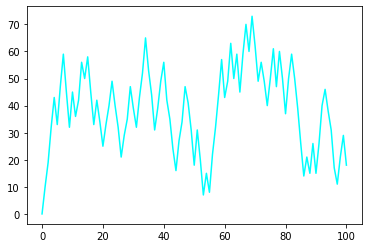

In [559]:
plt.plot(Step, Fitness, color = 'cyan')
plt.savefig('Random walk.png', transparent=True)

# Parameters

In [560]:
m = 100 
d = 1
f_bar = np.mean(Fitness)  #this is the mean value of the finess values
σ = np.var(Fitness)       #this is the variance value of the fitness values

# Correlation Calculations

In [561]:
r = []

for i in range(len(Fitness)-1):
    
    r_sum = (Fitness[i]-f_bar)*(Fitness[i+1]-f_bar)
    r.append(r_sum)
    
r = sum(r)*(1/((m-d)*σ))           #random walk correlation function
r

0.7387627992933611

In [562]:
l = 1/np.abs((np.log(np.abs(r))))  #correlation length
l

3.3027456720519637

In [563]:
a = np.max(Fitness)
b = np.min(Fitness)
diam_G = a - b
diam_G

73

In [564]:
ϵ = l/diam_G         #normalised correlation length
ϵ

0.045243091397972106

# Question 2

# Parameters

In [565]:
max_items = 2
s0 = [0, 1, 1, 0, 0, 0, 0, 0, 0]

In [566]:
#function to evaluate a solution x
def evaluate2(x):
          
    a=np.array(x)
    b=np.array(value)
    c=np.array(weights)
    
    totalObjects = sum(x)
    
    totalValue = np.dot(a,b)     #compute the value of the knapsack selection
    totalWeight = np.dot(a,c)    #compute the weight value of the knapsack selection
    
    if totalWeight > Maxweight:
        totalValue = "infeasible" 
        
    if totalObjects == 2:         #add in the restriction that there can only be twon items
        totalValue = totalValue
        
    else:
        totalValue = "infeasible" 

    return totalValue   #returns the total value of the items

In [567]:
evaluate2(s0)

20

In [568]:
current = [1, 0, 0, 0, 0, 0, 0, 0, 0]

In [569]:
U = []

current = [1, 0, 0, 0, 0, 0, 0, 0, 0]  #use this point as a starting point to find all potential solutions

while len(U) < 36:
    
    Neighbour = neighborhood(current)
    
    for i in range(len(current)):
        
        feasible = evaluate2(Neighbour[i])   #use evaluate 2 because it has the added restriction of only allowing two items
        
        if feasible != 'infeasible':       #make sure that the solution is feasible
            if Neighbour[i] not in U:      #make sure that the solution is unique and not already in the list 
                U.append(Neighbour[i])
            
    max = np.max(current)
    condition = (current == max)
    result = np.where(condition)[0]

    for i in range(len(current)):       

        if current[i] == 1:     
            current[i] = 0 

        current[result[0] + 1] = 1    #Change the starting point to another solution that only has one item at a different point

    print(current)
    
print(U)

[0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
[[1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0,

In [570]:
Objective_function_U = []

for i in range(len(U)):

    feasable = evaluate(U[i])
    Objective_function_U.append(feasable)
    
print(Objective_function_U)

[19, 17, 20, 22, 18, 14, 15, 21, 20, 23, 25, 21, 17, 18, 24, 21, 23, 19, 15, 16, 22, 26, 22, 18, 19, 25, 24, 20, 21, 27, 16, 17, 23, 13, 19, 20]


In [571]:
x_current = U[0]                  #The current starting solution 
x_best = x_current                #The best solution 
f_current = evaluate(x_current)   #The value of the current starting soluton 
f_best = f_current                #The value of the best solution

print(x_current, x_best, f_current, f_best)

[1, 1, 0, 0, 0, 0, 0, 0, 0] [1, 1, 0, 0, 0, 0, 0, 0, 0] 19 19


In [572]:
O = []
walk = []

for i in range(len(U)):  #This loops the algorithm through multiple start points of the solutions in U 
    
    x_current = U[i]                  #The current solution of the iteration
    x_best = x_current                #The best solution
    f_current = evaluate(x_current)   #The value of the current soluton of the iteration
    f_best = f_current                #The value of the best solution

    print('\ninitial conditions:', x_current, x_best, f_current, f_best)
    
    done = 0
    solutionsChecked = 0      #varaible to record the number of solutions evaluated in each iteration

    while done == 0:

        solutionsChecked = solutionsChecked + 1

        Neighborhood = neighborhood(x_current)   #create a list of all neighbors in the neighborhood of x_curr

        z = []
        for i in range(n):
            ans = evaluate(Neighborhood[i])      #evaluate and return the objective function for each of the neighbours
            z.append(ans)
            
        for i in range(n):

            if(z[i] == 'infeasible'):
                x_best = x_best

            elif(z[i] > f_best):
                x_best = Neighborhood[i]
                f_best = evaluate(Neighborhood[i])

        if f_best == f_current:         #if there were no improving solutions in the neighborhood
            done = done + 1
            O.append(x_best)
            
        else:
            x_current = x_best         #else: move to the neighbor solution and continue
            f_current = f_best  
            
    walk.append(solutionsChecked)
    print ("\nFinal number of solutions checked: ", solutionsChecked)
    print ("Best value found: ", f_best)
    print ("Weight is: ", f_best)
    print ("Total number of items selected: ", np.sum(x_best))
    print ("Best solution: ", x_best)


initial conditions: [1, 1, 0, 0, 0, 0, 0, 0, 0] [1, 1, 0, 0, 0, 0, 0, 0, 0] 19 19

Final number of solutions checked:  6
Best value found:  74
Weight is:  74
Total number of items selected:  7
Best solution:  [1, 1, 0, 1, 1, 1, 1, 0, 1]

initial conditions: [1, 0, 1, 0, 0, 0, 0, 0, 0] [1, 0, 1, 0, 0, 0, 0, 0, 0] 17 17

Final number of solutions checked:  6
Best value found:  73
Weight is:  73
Total number of items selected:  7
Best solution:  [1, 1, 1, 1, 1, 0, 1, 0, 1]

initial conditions: [1, 0, 0, 1, 0, 0, 0, 0, 0] [1, 0, 0, 1, 0, 0, 0, 0, 0] 20 20

Final number of solutions checked:  6
Best value found:  74
Weight is:  74
Total number of items selected:  7
Best solution:  [1, 1, 0, 1, 1, 1, 1, 0, 1]

initial conditions: [1, 0, 0, 0, 1, 0, 0, 0, 0] [1, 0, 0, 0, 1, 0, 0, 0, 0] 22 22

Final number of solutions checked:  6
Best value found:  74
Weight is:  74
Total number of items selected:  7
Best solution:  [1, 1, 0, 1, 1, 1, 1, 0, 1]

initial conditions: [1, 0, 0, 0, 0, 1, 0, 0, 0]

In [573]:
O

[[1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 1, 0, 1],
 [1, 0, 1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 1, 0, 1, 0, 1],
 [0, 0, 1, 1, 1, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 0, 1],
 [0, 1, 0,

In [574]:
Objective_function_U = []

for i in range(len(U)):

    feasable = evaluate(U[i])
    Objective_function_U.append(feasable)
    
#print(Objective_function_U)

Objective_function_O = []

for i in range(len(O)):

    feasable = evaluate(O[i])
    Objective_function_O.append(feasable)
    
#print(Objective_function_O)

In [575]:
cardinality_O = []

count = 0
for i in O:
    if i not in cardinality_O:
        count += 1
        cardinality_O.append(i)
        
#print(cardinality_O)

cardinality_U = []

count = 0
for i in U:
    if i not in cardinality_U:
        count += 1
        cardinality_U.append(i)
        
#print(cardinality_U)

In [576]:
Amp_U = (cardinality.count(cardinality_U)*(np.max(Objective_function_U)-np.min(Objective_function_U)))/sum(Objective_function_U)

In [577]:
Amp_O = (cardinality.count(cardinality_O)*(np.max(Objective_function_O)-np.min(Objective_function_O)))/sum(Objective_function_O)

In [578]:
ΔAmp = (Amp_U - Amp_O)/Amp_U

In [579]:
f_star = 74

gaps = []

for i in range(len(O)):
    gap = Objective_function_O[i] - f_star
    gaps.append(gap)
    
gap_O = sum(gaps)/ (cardinality.count(cardinality_O)*f_star)
print(sum(gaps))
print((cardinality.count(cardinality_O)*f_star))
gap_O

-111
518


-0.21428571428571427

In [580]:
print(walk)

LLM = sum(walk)/cardinality.count(cardinality_U)
print(sum(walk))
LLM

[6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 4, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 4, 6, 5, 6, 5]
205


5.694444444444445

In [581]:
f_star = 74

gaps = []

for i in range(len(U)):
    gap = Objective_function_U[i] - f_star
    gaps.append(gap)
    
gap_U = sum(gaps)/ (cardinality.count(cardinality_U)*f_star)
print(sum(gaps))
print((cardinality.count(cardinality_U)*f_star))
gap_U

-1944
2664


-0.7297297297297297